# A notebook that generates the inference for Pan-Nuke dataset

Reference:
- https://machinelearningspace.com/coco-dataset-a-step-by-step-guide-to-loading-and-visualizing/#step4

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
main_folder = '..'
if main_folder not in sys.path:
    sys.path.append(main_folder)

import numpy as np
import matplotlib.pyplot as plt
from mmdet.apis import init_detector, show_result_pyplot
from open_set.utils.eval.inference import inference_detector

from pycocotools.coco import COCO
from PIL import Image

/opt/conda/envs/betray/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/opt/conda/envs/betray/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'Set' is not defined

In [ ]:
# OVIS model
config_file = '../configs/demo/path_ground_baseline.py'
checkpoint_file = '../work_dirs/path_ground_baseline/epoch_20.pth'

In [195]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file)

/opt/conda/envs/betray/lib/python3.10/site-packages/mmdet/models/losses/cross_entropy_loss.py:239: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: ../work_dirs/path_ground_baseline/epoch_20.pth


In [218]:
val_coco = COCO("/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/annotations_region_only/val_instances.json")
coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/annotations_region_only/val_captions.json')

img_dir = "/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/images"
image_id = 5183

img = val_coco.imgs[image_id]

loading annotations into memory...
Done (t=1.37s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [219]:
cat_by_id = {}
for cat_id in val_coco.getCatIds():
    cat_by_id[cat_id] = val_coco.loadCats(cat_id)[0]['name']

{'license': 1, 'file_name': '5183.jpg', 'coco_url': '', 'height': 256, 'width': 256, 'date_captured': '', 'flickr_url': '', 'organ': 'Breast', 'id': 5183}
anno category ids = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]
{1: 'neoplastic', 2: 'inflammatory', 3: 'connective', 4: 'dead', 5: 'epithelial', 6: 'background'}


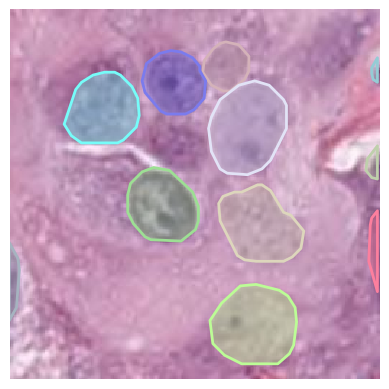

In [220]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')

# Get the ids of the captions
#caption_annotation_ids = coco_captions.getAnnIds(imgIds=image_id)
#print(caption_annotation_ids)
#captions = coco_captions.loadAnns(caption_annotation_ids)
print(img)
cat_ids = val_coco.getCatIds()
anns_ids = val_coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = val_coco.loadAnns(anns_ids)
val_coco.showAnns(anns, draw_bbox=False)
plt.axis(False)
print(f"anno category ids = {[x['category_id'] for x in anns]}")
print(cat_by_id)

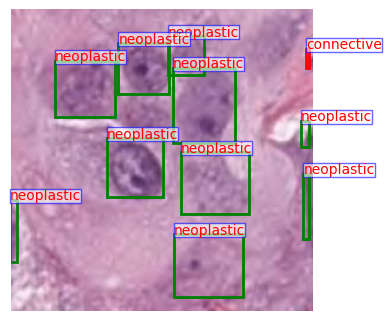

In [221]:
# define a list of colors for drawing bounding boxes
color_list = ["blue", "green", "orange", "red", "orange", "yellow", "black", "pink", "magenta", "aqua"]*10

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
for ann in anns:
    bbox = ann['bbox']
    x, y, w, h = [int(b) for b in bbox]
    class_id = ann["category_id"]
    class_name = val_coco.loadCats(class_id)[0]["name"]
    color_ = color_list[class_id]
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color_, facecolor='none')
    t_box=ax.text(x, y, class_name,  color='red', fontsize=10)
    t_box.set_bbox(dict(boxstyle='square, pad=0',facecolor='white', alpha=0.6, edgecolor='blue'))
    ax.add_patch(rect)

ax.axis('off')
ax.imshow(image)
#ax[0,0].set_xlabel('Longitude')
plt.tight_layout()
plt.show()

In [222]:
# Predict segmentation results, as well as image captions
result = inference_detector(model, image, with_caption=True, logging=True)[0]

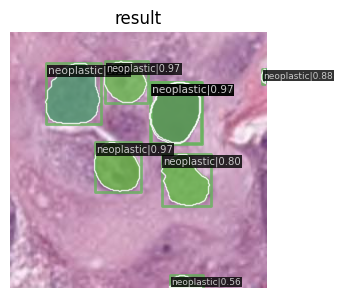

In [226]:
# show the results
show_result_pyplot(model, image, result, score_thr=0.5)

In [234]:
result = inference_detector(model, image, with_caption=True, logging=True, grounding_str="necrosis", candidate_per_im=10)[0]

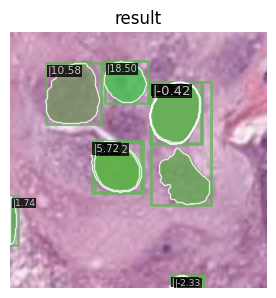

In [235]:
show_result_pyplot(model, image, result, score_thr=-2000)